✅ Objetivo Geral Requerido

Desenvolver um modelo de análise baseado em regressão linear, partindo de um modelo Entidade-Relacionamento (ER) construído a partir do domínio do problema.

💡 Sua ideia do projeto

Prever o tempo necessário para que um cliente possa adquirir um produto X, considerando que ele poupa um valor fixo por semana (ex: R$50/semana). Os dados disponíveis incluem preços dos produtos e compras realizadas.

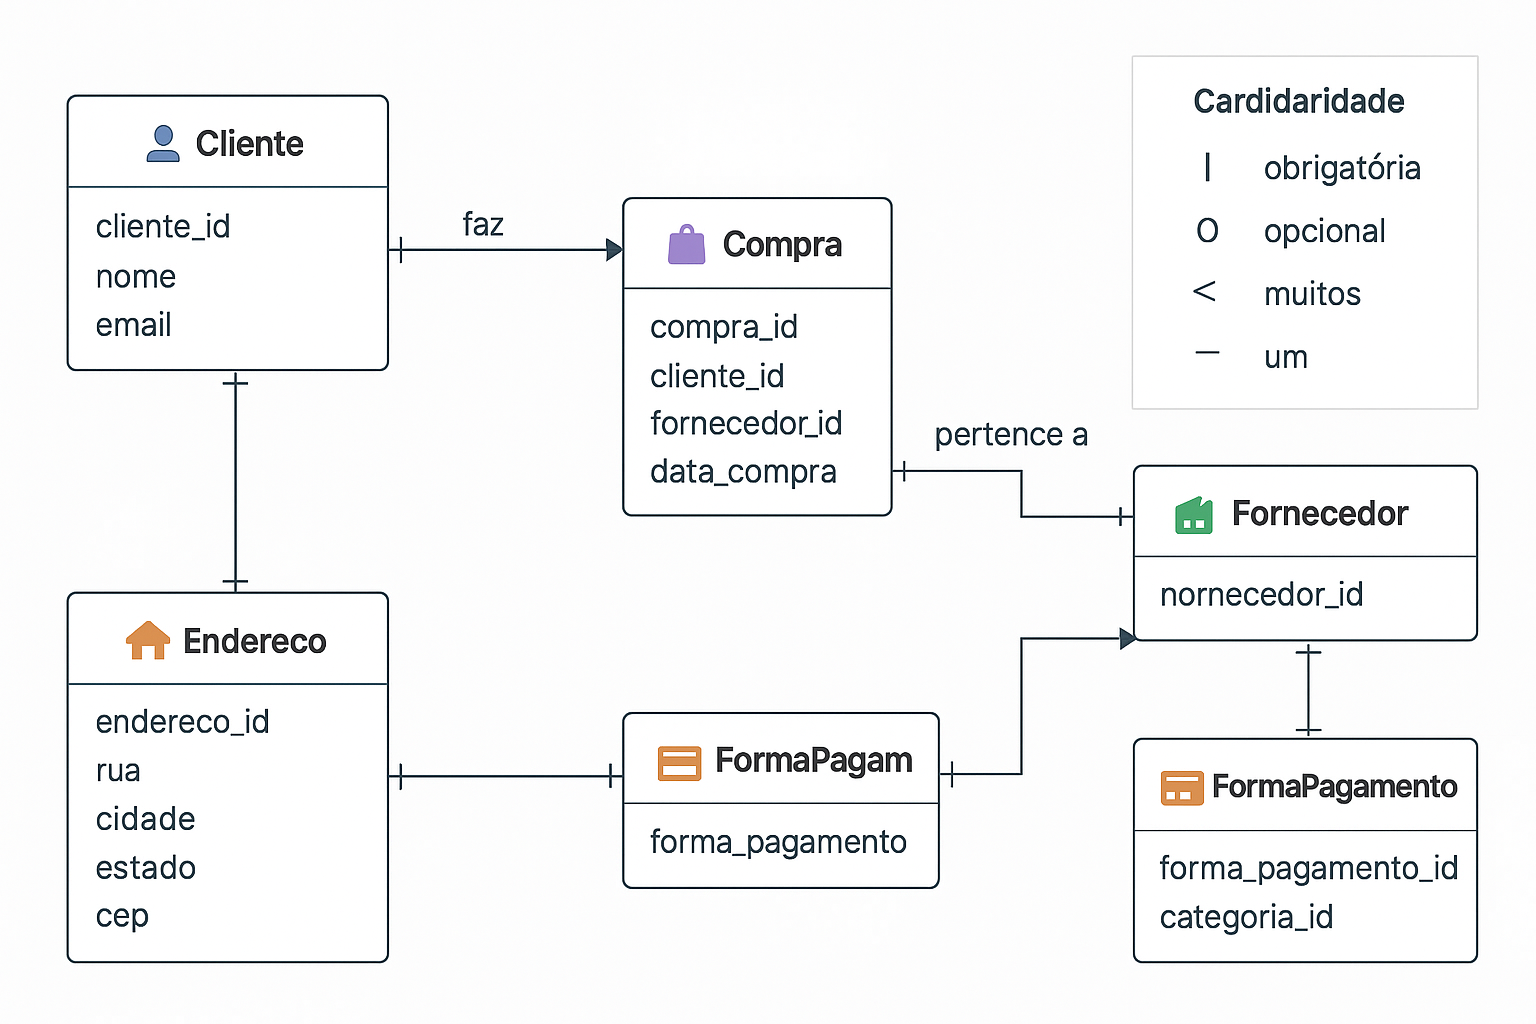

Cliente |———| Endereço
   |
   |———< Compra >———| Fornecedor |———< FormaPagamento
                         |
                         >———< Produto (via ItemCompra)


Relacionamentos com cardinalidade:

Cliente — (1:N) — Compra

Cliente faz muitas Compras, mas cada Compra pertence a um único Cliente.

→ 1 Cliente |———< Compra

Cliente — (1:1) — Endereço

Cada Cliente tem 1 Endereço e cada Endereço pertence a 1 Cliente.

→ Cliente |———| Endereço

Compra — (N:1) — Fornecedor

Cada Compra pertence a um Fornecedor. Um Fornecedor pode ter várias Compras.

→ Compra >———| Fornecedor

Compra — (N:M) — Produto (não aparece no seu diagrama, mas "contém" e "formecesso" sugerem esse conceito).

Compra contém muitos Produtos e cada Produto pode estar em muitas Compras.

Sugestão:

Criar entidade associativa chamada ItemCompra:



In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

In [11]:
produto = pd.read_csv('produto.csv')
cliente = pd.read_csv('cliente.csv')
compra = pd.read_csv('compra.csv')

In [17]:
produto

,Produto_ID,Nome_Produto,Preco_R$
0,1,Smartphone X,1200
1,2,Notebook Y,3000
2,3,Fones Bluetooth,250
3,4,Bicicleta Z,1500
4,5,TV Smart,2800
5,6,Console Game,2500
6,7,Câmera Digital,1800
7,8,Tablet,1100
8,9,Impressora,650
9,10,Relógio Smart,450


In [18]:
cliente

,Cliente_ID,Nome,Saldo_Poupanca_R$
0,1,Ana Souza,200
1,2,Bruno Costa,500
2,3,Carla Lima,150
3,4,Diego Martins,1000
4,5,Elisa Rocha,300


In [4]:
compra

,Compra_ID,Cliente_ID,Produto_ID,Data_Compra
0,1,1,1,2025-03-12
1,2,2,3,2025-03-15
2,3,3,6,2025-04-10
3,4,4,4,2025-04-20
4,5,5,2,2025-05-05
5,6,1,7,2025-05-12
6,7,2,5,2025-05-15
7,8,3,9,2025-05-18
8,9,4,10,2025-05-25
9,10,5,8,2025-06-01


In [13]:
# Merge compra + produto + cliente
compra_produto_cliente = compra.merge(produto, on='Produto_ID').merge(cliente, on='Cliente_ID')

In [14]:
# Calcular Tempo_Estimado_Semanas considerando saldo na poupança
compra_produto_cliente['Tempo_Estimado_Semanas'] = (
    (compra_produto_cliente['Preco_R$'] - compra_produto_cliente['Saldo_Poupanca_R$']) / 50
).clip(lower=0)  # Garante que não haja tempo negativo

In [15]:
# Definindo as variáveis
X = compra_produto_cliente[['Preco_R$', 'Saldo_Poupanca_R$']].values
y = compra_produto_cliente['Tempo_Estimado_Semanas'].values

In [16]:
# Criando e treinando o modelo
modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression()

In [17]:
# Mostrando os coeficientes
print(f"Coeficientes: {modelo.coef_}")
print(f"Intercepto: {modelo.intercept_}")

Coeficientes: [ 0.01840511 -0.01437658]
Intercepto: 1.6141370194955371


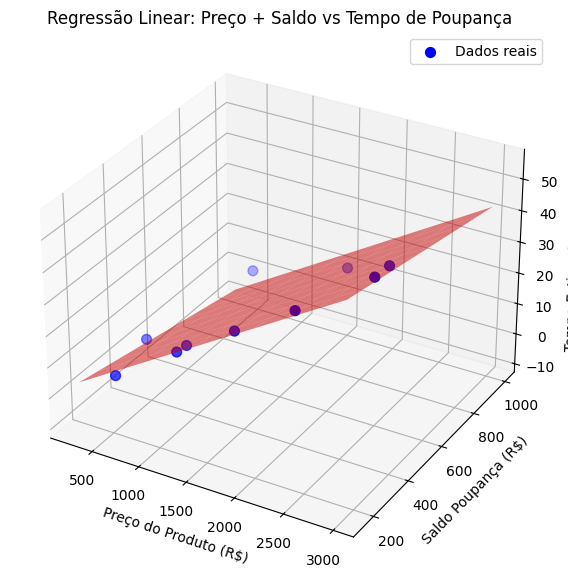

In [18]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Dados reais
ax.scatter(
    compra_produto_cliente['Preco_R$'],
    compra_produto_cliente['Saldo_Poupanca_R$'],
    compra_produto_cliente['Tempo_Estimado_Semanas'],
    color='blue', s=50, label='Dados reais'
)

# Superfície de regressão
preco_range = np.linspace(compra_produto_cliente['Preco_R$'].min(), compra_produto_cliente['Preco_R$'].max(), 10)
saldo_range = np.linspace(compra_produto_cliente['Saldo_Poupanca_R$'].min(), compra_produto_cliente['Saldo_Poupanca_R$'].max(), 10)

preco_grid, saldo_grid = np.meshgrid(preco_range, saldo_range)
tempo_predito = modelo.predict(np.c_[preco_grid.ravel(), saldo_grid.ravel()]).reshape(preco_grid.shape)

ax.plot_surface(preco_grid, saldo_grid, tempo_predito, color='red', alpha=0.5)

# Labels
ax.set_xlabel('Preço do Produto (R$)')
ax.set_ylabel('Saldo Poupança (R$)')
ax.set_zlabel('Tempo Estimado (semanas)')
ax.set_title('Regressão Linear: Preço + Saldo vs Tempo de Poupança')
ax.legend()
plt.show()


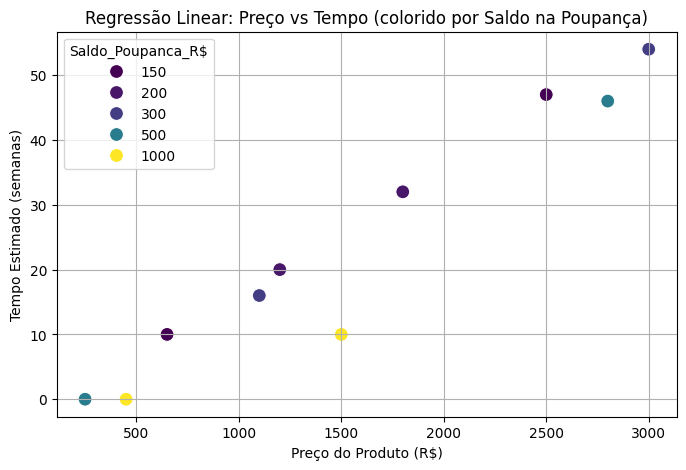

In [19]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='Preco_R$',
    y='Tempo_Estimado_Semanas',
    hue='Saldo_Poupanca_R$',
    palette='viridis',
    data=compra_produto_cliente,
    s=100
)
plt.xlabel('Preço do Produto (R$)')
plt.ylabel('Tempo Estimado (semanas)')
plt.title('Regressão Linear: Preço vs Tempo (colorido por Saldo na Poupança)')
plt.grid(True)
plt.show()

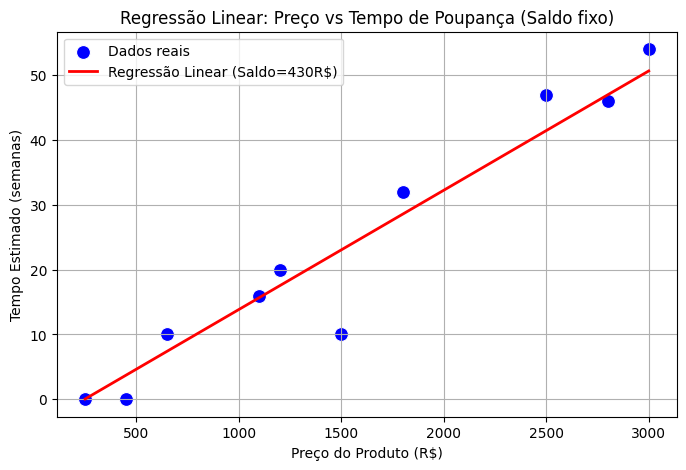

In [20]:
saldo_fixo = compra_produto_cliente['Saldo_Poupanca_R$'].mean()

# Geração da linha de regressão
X_pred = np.linspace(compra_produto_cliente['Preco_R$'].min(), compra_produto_cliente['Preco_R$'].max(), 100)
X_input = np.c_[X_pred, np.full_like(X_pred, saldo_fixo)]
y_pred = modelo.predict(X_input)

plt.figure(figsize=(8,5))
sns.scatterplot(x='Preco_R$', y='Tempo_Estimado_Semanas', data=compra_produto_cliente, s=100, color='blue', label='Dados reais')
plt.plot(X_pred, y_pred, color='red', linewidth=2, label=f'Regressão Linear (Saldo={saldo_fixo:.0f}R$)')
plt.xlabel('Preço do Produto (R$)')
plt.ylabel('Tempo Estimado (semanas)')
plt.title('Regressão Linear: Preço vs Tempo de Poupança (Saldo fixo)')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
def simular_tempo_com_modelo(nome_cliente, nome_produto):
    try:
        cliente_info = cliente[cliente['Nome'] == nome_cliente].iloc[0]
        produto_info = produto[produto['Nome_Produto'] == nome_produto].iloc[0]
    except IndexError:
        print("❌ Cliente ou Produto não encontrado!")
        return None

    preco = produto_info['Preco_R$']
    saldo = cliente_info['Saldo_Poupanca_R$']

    # 🚀 Fazer a previsão
    entrada = np.array([[preco, saldo]])
    tempo_estimado = modelo.predict(entrada)[0]

    tempo_estimado = max(0, tempo_estimado)  # não permitir valor negativo

    print(f"🧑 Cliente: {nome_cliente}")
    print(f"🛍️ Produto: {nome_produto}")
    print(f"💰 Saldo atual: R${saldo}")
    print(f"🏷️ Preço do produto: R${preco}")
    print(f"⏳ Tempo estimado para compra (modelo): {round(tempo_estimado, 2)} semanas\n")

    return tempo_estimado
simular_tempo_com_modelo('Ana Souza', 'TV Smart')

🧑 Cliente: Ana Souza
🛍️ Produto: TV Smart
💰 Saldo atual: R$200
🏷️ Preço do produto: R$2800
⏳ Tempo estimado para compra (modelo): 50.27 semanas



np.float64(50.273130300693914)

🎬 Roteiro de Vídeo – Didático e Explicativo (3 minutos)

🎯 Introdução (0:00 – 0:30)

Imagem: Animação de banco de dados ou pessoas economizando dinheiro.

Texto na tela: "Análise Preditiva com Regressão Linear"
Narração:

"Seja bem-vindo! Hoje vamos aprender como podemos usar um modelo de regressão linear para prever em quanto tempo uma pessoa consegue comprar um produto, com base no seu saldo atual e na sua capacidade de poupança semanal."

"Vamos transformar dados de clientes, produtos e compras em informações valiosas para tomada de decisão financeira!"

📊 Apresentação dos Dados (0:30 – 1:10)
Imagem: Tabelas animadas aparecendo na tela.

Tabela de Produtos: Nome e Preço.

Tabela de Clientes: Nome e Saldo na poupança.

Tabela de Compras: Qual cliente comprou qual produto e quando.

Narração:

"Nosso projeto utiliza três bases principais:

A base de Clientes, com nome e saldo atual na poupança.

A base de Produtos, contendo nome e preço dos itens.

E a base de Compras, que liga os clientes aos produtos adquiridos."

"Nosso objetivo é responder: 'Se uma pessoa quer comprar um produto, quanto tempo ela precisa economizar?', considerando uma economia fixa de R$50 por semana."

🔢 Modelagem e Análise (1:10 – 2:20)
Imagem: Código aparecendo rapidamente, seguido por gráficos.

🎯 Mostrar o código do merge das tabelas.

🎯 Mostrar o cálculo:

Tempo = (Preço - Saldo na poupança) / 50

Gráfico 3D: Eixo X = Preço, Eixo Y = Saldo, Eixo Z = Tempo estimado.

Gráfico de dispersão colorido pelo saldo.

Narração:

"Com os dados integrados, calculamos o Tempo Estimado em Semanas para cada compra.
Utilizamos a Regressão Linear, que analisa como o preço do produto e o saldo atual impactam no tempo necessário."

"O modelo encontrou que:

O aumento no preço do produto aumenta o tempo necessário.

E o aumento no saldo na poupança reduz esse tempo."

"Visualizamos isso em gráficos 3D e gráficos de dispersão, onde vemos claramente essa relação."

🚀 Simulações e Conclusões (2:20 – 3:00)
Imagem: Simulação na tela com avatar ou animação.
Texto: "Ana Souza quer comprar uma TV Smart (R$2800), saldo atual: R$200."
Aparece o cálculo e o resultado.

Narração:

"Vamos fazer uma simulação:
A Ana Souza, que tem um saldo atual de R$200, quer comprar uma TV Smart de R$2800.

O modelo prevê que ela precisaria de aproximadamente 50 semanas, economizando R$50 por semana, para conseguir comprar esse produto."

"Esse é um exemplo simples, mas muito poderoso, de como modelos preditivos podem ajudar no planejamento financeiro e na tomada de decisões."

"E claro, isso pode ser expandido para cenários reais de empresas, com dados bem maiores!"

✅ Encerramento (3:00)
Imagem: Tela final com texto "Ciência de Dados na Prática | Obrigado por assistir!"
Narração:

"Se você gostou dessa aplicação prática de análise de dados, imagine o que mais é possível construir combinando dados e inteligência artificial. Até a próxima!"


